In [30]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.cm as cm
import pathlib as path
from common_import import raw_dir, data_dir,tab_dir,fig_dir
from cycler import cycler


# Plot Configuration
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 24})
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=24)
#plt.rc('axes',prop_cycle=cycler(color=['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b','810f7c','purple']))
plt.rc('lines', linewidth=3)

#plt.rc('text', usetex=True)
#sns.color_palette("Paired")

print_names = {'carbonated':'SSB','cigars':'cigarettes','beer':'beer','wine':'wine',
        'liquor':'spirits','ethanol':'ethanol', 'toilet_tissue':'toilet tissue','yogurt':'yogurt'}


def get_colors(use_bw=True):
    if use_bw:
        my_colors = {'carbonated':'0.00','cigars':'0.40','beer':'0.00','wine':'0.60',
             'liquor':'0.00','ethanol':'0.00', 'toilet_tissue':'0.60','yogurt':'0.40'}
        my_styles = {'carbonated':'dashdot','cigars':'solid','beer':'dotted','wine':'dashdot',
             'liquor':'dashed','ethanol':'solid', 'toilet_tissue':'dotted','yogurt':'dashed'}
    else:
        my_colors = {'carbonated':(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
                     'cigars':(0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
                     'beer':(0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
                     'wine':(0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
                     'liquor':(0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
                     'ethanol':(0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
                     'toilet_tissue': (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
                     'yogurt':'coral'}
        my_styles = {'carbonated':'solid','cigars':'solid','beer':'solid','wine':'solid',
             'liquor':'solid','ethanol':'solid', 'toilet_tissue':'dashed','yogurt':'dashed'}
    return my_colors, my_styles
        
        
# https://www.ellipsix.net/blog/2012/11/the-gini-coefficient-for-distribution-inequality.html
def gini_coeff(x):
    # requires all values in x to be zero or positive numbers,
    # otherwise results are undefined
    n = len(x)
    s = x.sum()
    r = np.argsort(np.argsort(-x)) # calculates zero-based ranks
    return 1 - (2.0 * (r*x).sum() + s)/(n*s)

def get_list_to_draw(df,key,qtiles=np.linspace(0,1,101)):
    x = np.sort(df[key].values) 
    return np.quantile(np.cumsum(x)/np.sum(x),qtiles)

def draw_cdf(df,ax1,ax2,use_bw=True):
    my_colors, my_styles = get_colors(use_bw)
    x1 = np.linspace(0,1,101)
    x2 = x1[90:]
    gini_values = []
    for k in my_styles.keys():
        v = get_list_to_draw(df, k, x1)
        ax1.plot(x1,v,color=my_colors[k],linestyle=my_styles[k])
        ax2.plot(x2,v[90:],color=my_colors[k],linestyle=my_styles[k])
        gini_values.append(print_names[k]+': '+str(gini_coeff(df[k].values).round(3)))
  
    # for n in normal_goods:
    ax1.set_ylabel("percentage of total purchases")
    ax1.set_xlabel("purchase percentile")
    ax2.set_xlabel("purchase percentile")
    ax1.set_title("Panel A: Sin Good Purchases")
    ax2.set_title("Panel B: Top Decile Sin Good Purchases")
    return gini_values
    

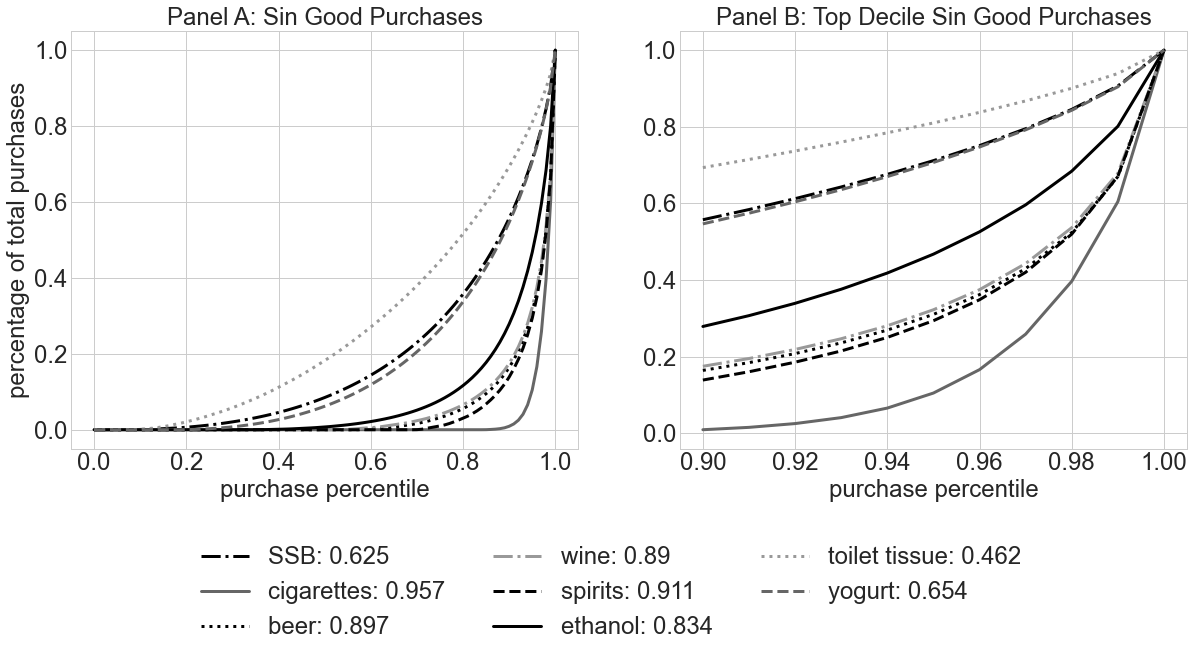

In [31]:
black_white = True
df = pd.read_parquet(data_dir/'panel_data_all_years.parquet')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
legend_labels=draw_cdf(df, ax1, ax2, black_white)

fig.legend(
    labels=legend_labels,   # The labels for each line
    loc="center",   # Position of legend
    borderaxespad=0.1,    # Small spacing around legend box
    #title="Consumption Type",  # Title for the legend
    bbox_to_anchor=(0.5,0.1),
    ncol=3
)
# Create the legend
plt.subplots_adjust(bottom=0.3)
plt.savefig(fig_dir/'Figure1A.pdf',bbox_inches="tight")